In [1]:
# What version python do you have 
#import tensorflow.keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

check_gpu = len(tf.config.list_physical_devices('GPU'))>0
print("GPU is", "available" if check_gpu \
      else "NOT AVAILABLE" )

GPU is available


In [2]:
#tipos de datos 
DTYPE = 'float32'
tf.keras.backend.set_floatx(DTYPE)   #establece el tipo de float predeterminado

In [143]:
#Número de Puntos Dominio
N_r = 100 

#Dominio 1
xmin = 0 
xmax = 2
ymin = 0
ymax = 2

#Cotas Inferiores
lb = tf.constant([xmin, ymin], dtype = DTYPE)

#Cotas Superiores
ub = tf.constant([xmax, ymax], dtype = DTYPE)

#Dibujo de un muestreo uniforme de los puntos de colocación
tf.random.set_seed(5)
x_r = tf.random.uniform((N_r,1), lb[1], ub[1], dtype = DTYPE)
tf.random.set_seed(9)
y_r = tf.random.uniform((N_r,1), lb[0], ub[0], dtype = DTYPE)
X_r = tf.concat([x_r, y_r], axis = 1) #Muestreo aleatorio simple en el cuadrado [0,0.1703] x [0,3.3]


#Número de Puntos Borde
N_u = 20

#Condición de Borde 
x_1 = tf.ones((N_u,1), dtype = DTYPE)*0
y_1 = tf.random.uniform((N_u,1), 0, 2, dtype = DTYPE)
X_b1 = tf.concat([x_1, y_1], axis = 1) 

#Condición de Borde 
x_2 = tf.random.uniform((N_u,1), 0, 2, dtype = DTYPE)
y_2 = tf.ones((N_u,1), dtype = DTYPE)*0
X_b2 = tf.concat([x_2, y_2], axis = 1) 

#Condición de Borde 
x_3 = tf.ones((N_u,1), dtype = DTYPE)*2
y_3 = tf.random.uniform((N_u,1), 0, 2, dtype = DTYPE)
X_b3 = tf.concat([x_3, y_3], axis = 1) 

#Condición de Borde 
x_4 = tf.random.uniform((N_u,1), 0, 2, dtype = DTYPE)
y_4 = tf.ones((N_u,1), dtype = DTYPE)*2
X_b4 = tf.concat([x_4, y_4], axis = 1) 

#Condicion de borde
u_data = tf.ones((N_u,1), dtype = DTYPE)*0



In [144]:
X_r

<tf.Tensor: shape=(100, 2), dtype=float32, numpy=
array([[1.2527862 , 0.93393373],
       [1.0596864 , 1.5162864 ],
       [1.5169144 , 1.3992906 ],
       [1.0169768 , 0.5211184 ],
       [0.6883075 , 1.1209176 ],
       [0.63919544, 0.53426504],
       [1.3833001 , 1.4824421 ],
       [0.5330508 , 0.515954  ],
       [0.07456803, 1.7559657 ],
       [0.40391612, 1.2831407 ],
       [0.55514383, 1.7997627 ],
       [0.29028773, 0.4785478 ],
       [0.5264678 , 0.74091625],
       [0.61447597, 0.2133379 ],
       [0.6108284 , 1.191411  ],
       [0.8016813 , 1.0124481 ],
       [0.6238661 , 0.19784713],
       [1.8093629 , 0.1252377 ],
       [1.5833242 , 1.7275705 ],
       [1.5121839 , 1.519001  ],
       [1.231513  , 1.5537105 ],
       [0.07280564, 0.76948786],
       [1.8662145 , 1.9654763 ],
       [1.5298526 , 0.5072293 ],
       [1.4844828 , 0.7856996 ],
       [0.05717587, 1.0981889 ],
       [0.69291973, 1.916832  ],
       [0.89674973, 0.46544075],
       [0.9365287 , 1.2329

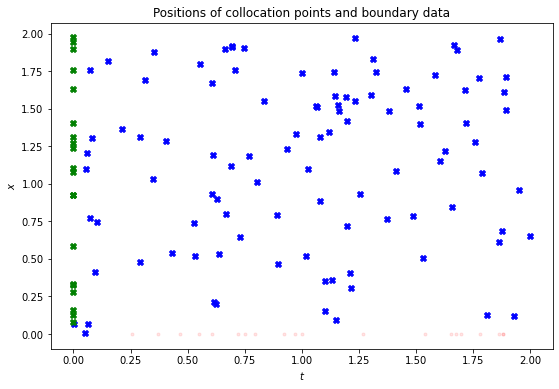

In [145]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(9,6))
plt.scatter(x_r, y_r, c='b', marker='X')
plt.scatter(x_1, y_1, c='g', marker='X')
plt.scatter(x_2, y_2, c='r', marker='.', alpha=0.1)
plt.xlabel('$t$')
plt.ylabel('$x$')

plt.title('Positions of collocation points and boundary data');
#plt.savefig('Xdata_Burgers.pdf', bbox_inches='tight', dpi=300)

In [72]:
#model(X_b1)

In [71]:
#u_data

In [11]:
#X_b1

In [14]:
def fun_0( x, y, u_xx, u_yy):
    #y = np.expand_dims(y, axis = -1)
   
    return u_xx + u_yy - 12*(x**2 + y**2) + 24*(x + y)

In [65]:
#Configuración Red Neuronal
def init_model(num_hidden_layers = 2, num_neurons_per_layer = 10 ):
    model = tf.keras.Sequential()
    model.add(tf.keras.Input(2))
    
    # Introduce a scaling layer to map input to [lb, ub]
    #scaling_layer = tf.keras.layers.Lambda(
    #            lambda x: 2.0*(x - 0)/(10 - 0) - 1.0)
    #model.add(scaling_layer)
    
    for _ in range(num_hidden_layers):
        model.add(tf.keras.layers.Dense(num_neurons_per_layer, 
                                        activation = tf.keras.activations.get('sigmoid'),
                                       kernel_initializer = 'glorot_normal'))
    model.add(tf.keras.layers.Dense(1))
    
    return model

In [66]:
model = init_model()

In [73]:
x, y = X_r[:,0:1], X_r[:,1:2]

with tf.GradientTape(persistent = True) as tape:         
    tape.watch(x)
    tape.watch(y)
    u = model(tf.stack([x[:,0], y[:,0]], axis=1))    
    u_x = tape.gradient(u,x)
    u_y = tape.gradient(u,y)
u_xx = tape.gradient(u_x,x)
u_yy = tape.gradient(u_y,y)

In [76]:
#u_xx

In [146]:
def get_r(model, X_r): 
    x, y = X_r[:,0:1], X_r[:,1:2]

    with tf.GradientTape(persistent = True) as tape:         
        tape.watch(x)
        tape.watch(y)
        u = model(tf.stack([x[:,0], y[:,0]], axis=1))    
        u_x = tape.gradient(u,x)
        u_y = tape.gradient(u,y)
    u_xx = tape.gradient(u_x,x)
    u_yy = tape.gradient(u_y,y)
    
    #del tape
    
    
    return fun_0( x, y, u_xx, u_yy)
        
    #return fun_0(x, y, dy_dx) 

In [147]:
def compute_loss(model, X_r, X_b1, X_b2, X_b3, X_b4, u_data):
    
    # Compute phi^r
    r = get_r(model, X_r)
    phi_r = tf.reduce_mean(tf.square(r))
    
    # Initialize loss
    loss = phi_r
    
    # Add phi^0 and phi^b to the loss
    
    u_pred1 = model(X_b1)
    loss += tf.reduce_mean(tf.square(u_data - u_pred1))
    
    u_pred2 = model(X_b2)
    loss += tf.reduce_mean(tf.square(u_data - u_pred2))
    
    u_pred3 = model(X_b3)
    loss += tf.reduce_mean(tf.square(u_data - u_pred3))
    
    u_pred4 = model(X_b4)
    loss += tf.reduce_mean(tf.square(u_data - u_pred4))
    
    return loss



In [148]:
model(X_b4)

<tf.Tensor: shape=(20, 1), dtype=float32, numpy=
array([[-0.00336081],
       [ 0.05215961],
       [ 0.00935394],
       [-0.0579648 ],
       [ 0.01268828],
       [ 0.05506921],
       [ 0.00542253],
       [-0.05225629],
       [-0.00420827],
       [ 0.03512579],
       [-0.00867802],
       [-0.00775725],
       [ 0.05587882],
       [-0.0056622 ],
       [-0.00604105],
       [ 0.05248314],
       [ 0.04453719],
       [ 0.03039736],
       [-0.04341018],
       [-0.00796276]], dtype=float32)>

In [149]:
#Calculo de gradientes de la función de pérdida

#def get_grad(model, X_r, X_data, u_data):
def get_grad(model, X_r, X_b1, X_b2, X_b3, X_b4, u_data):
    with tf.GradientTape(persistent = True) as tape: 
        tape.watch(model.trainable_variables)
        loss = compute_loss(model, X_r, X_b1, X_b2, X_b3, X_b4, u_data)
        #loss = compute_loss(model, X_r, X_data, u_data)
        
    g = tape.gradient(loss, model.trainable_variables)    
    #del tape
    
    return loss, g

In [150]:
# Initialize model aka u_\theta
model = init_model()

# Choose the optimizer
optim = tf.keras.optimizers.Adam(0.001)

In [154]:
from time import time 

#@tf.function 
def train_step():
    loss, grad_theta = get_grad(model, X_r, X_b1, X_b2, X_b3, X_b4, u_data)
    #loss, grad_theta = get_grad(model, X_r, X_data, u_data)
    
    #Realizar paso del descenso de gradiente
    optim.apply_gradients(zip(grad_theta, model.trainable_variables))
    
    return loss

#Número de Épocas
N = 5000
hist = []

#Comienzo del tiempo
t0 = time()

for i in range(N+1):
    
    loss = train_step()
    hist.append(loss.numpy())
    
    #Salida después de 50 iteraciones
    if i%1000 == 0:
        print('It {:05d}: loss = {:10.8e}'. format(i,loss))
        
#Mostrar tiempo de calculo 
print('\nComputation time: {} seconds'.format(time()-t0))

It 00000: loss = 1.99015832e+00
It 01000: loss = 1.41847622e+00
It 02000: loss = 9.53832269e-01
It 03000: loss = 7.49987483e-01
It 04000: loss = 5.41122854e-01
It 05000: loss = 2.84849554e-01

Computation time: 208.09958910942078 seconds


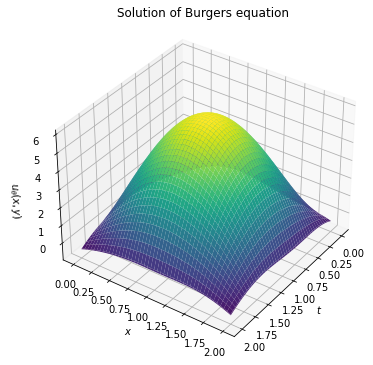

In [157]:
from mpl_toolkits.mplot3d import Axes3D

# Set up meshgrid
N = 600
xspace = np.linspace(lb[0], ub[0], N + 1)
yspace = np.linspace(lb[1], ub[1], N + 1)
X, Y = np.meshgrid(xspace, yspace)
Xgrid = np.vstack([X.flatten(),Y.flatten()]).T

# Determine predictions of u(x, y)
upred = model(tf.cast(Xgrid,DTYPE))

# Reshape upred
U = upred.numpy().reshape(N+1,N+1)

# Surface plot of solution u(t,x)
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, U, cmap='viridis');
ax.view_init(35,35)
ax.set_xlabel('$t$')
ax.set_ylabel('$x$')
ax.set_zlabel('$u_\\theta(x,y)$')
ax.set_title('Solution of Burgers equation');
#plt.savefig('Burgers_Solution.pdf', bbox_inches='tight', dpi=300);

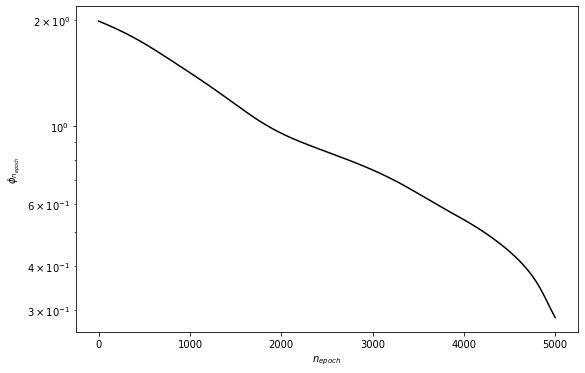

In [156]:
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
ax.semilogy(range(len(hist)), hist,'k-')
ax.set_xlabel('$n_{epoch}$')
ax.set_ylabel('$\\phi_{n_{epoch}}$');